# Gaussian Naive Bayes Classifier

# Importing all required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, nltk, warnings
import matplotlib.cm as cm
import itertools
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, linear_model, svm, tree, ensemble
from wordcloud import WordCloud, STOPWORDS
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from IPython.display import display, HTML
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline

df1 = pd.read_csv("globalterrorismdb_0718dist.csv", encoding='ISO-8859-1')

print('Dataframe dimensions:', df1.shape)

# Extracting the information about the type of columns and checking presence of null values.
tab_info=pd.DataFrame(df1.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df1.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df1.isnull().sum()/df1.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(tab_info)
display(df1[:5])

Dataframe dimensions: (181691, 135)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
column type,int64,int64,int64,int64,object,int64,object,int64,object,int64,...,object,object,object,object,object,int64,int64,int64,int64,object
null values (nb),0,0,0,0,172452,0,179471,0,0,0,...,153402,66191,104758,138175,0,0,0,0,0,156653
null values (%),0.0,0.0,0.0,0.0,94.914993,0.0,98.778145,0.0,0.0,0.0,...,84.430159,36.430533,57.657231,76.049447,0.0,0.0,0.0,0.0,0.0,86.219461


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# Creating 3 different dataframes

In [2]:
# Creation of the three dtaframes for training the Gaussian Naive Bayes Classiifcation model.
# Here only the dataframe with 41 attributes and 24 attributes are created.

df41 = df1.copy()
df1.drop(['iyear','eventid','approxdate','extended','resolution','specificity','vicinity','location','summary','crit1','crit2','crit3','doubtterr','alternative','alternative_txt','attacktype2','attacktype2_txt','attacktype3','attacktype3_txt','corp1','natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'ransom', 'ransomamt','targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt','targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt','gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive','guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claimmode2_txt','claim3', 'claimmode3', 'claimmode3_txt', 'compclaim','weaptype2', 'weaptype2_txt', 'weapsubtype2', 'weapsubtype2_txt', 'weaptype3', 'weaptype3_txt', 'weapsubtype3', 'weapsubtype3_txt', 'weaptype4', 'weaptype4_txt', 'weapsubtype4', 'weapsubtype4_txt','weapdetail','nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte', 'property', 'propextent', 'propextent_txt', 'propvalue', 'propcomment', 'ishostkid', 'nhostkid', 'nhostkidus', 'nhours', 'ndays', 'divert', 'kidhijcountry', 'ransomamtus', 'ransompaid', 'ransompaidus', 'ransomnote', 'hostkidoutcome', 'hostkidoutcome_txt', 'nreleased', 'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource','INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related', 'weaptype1_txt','weapsubtype1_txt'], axis = 1,inplace=True)
df41.drop(['approxdate','extended','resolution','specificity','crit1','crit2','crit3','doubtterr','alternative','alternative_txt','attacktype2','corp1','natlty1', 'natlty1_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt','targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt','gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive','guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claimmode2_txt','claim3', 'claimmode3', 'claimmode3_txt', 'compclaim','weaptype2', 'weaptype2_txt', 'weapsubtype2', 'weapsubtype2_txt', 'weaptype3', 'weaptype3_txt', 'weapsubtype3', 'weapsubtype3_txt', 'weaptype4', 'weaptype4_txt', 'weapsubtype4', 'weapsubtype4_txt','weapdetail','nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte', 'propvalue', 'propcomment', 'ishostkid', 'nhostkid', 'nhostkidus', 'nhours', 'ndays', 'divert', 'kidhijcountry', 'ransomamtus', 'ransompaid', 'ransompaidus', 'ransomnote', 'hostkidoutcome', 'hostkidoutcome_txt', 'nreleased', 'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource','INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related', 'weaptype1_txt','weapsubtype1_txt'], axis = 1,inplace=True)

In [3]:
df41.shape

(181691, 41)

In [4]:
df1.dropna(axis = 0, subset = ['gname'], inplace = True)
print('Dataframe dimensions of df1:', df1.shape)
tab_info=pd.DataFrame(df1.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df1.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df1.isnull().sum()/df1.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(tab_info)

df41.dropna(axis = 0, subset = ['gname'], inplace = True)
print('Dataframe dimensions of df41:', df41.shape)
tab_info=pd.DataFrame(df41.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df41.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df41.isnull().sum()/df1.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(tab_info)

Dataframe dimensions of df1: (181691, 24)


,imonth,iday,country,country_txt,region,region_txt,provstate,city,latitude,longitude,...,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,target1,gname,weaptype1,weapsubtype1,nkill
column type,int64,int64,int64,object,int64,object,object,object,float64,float64,...,object,int64,object,float64,object,object,object,int64,float64,float64
null values (nb),0,0,0,0,0,0,421,434,4556,4557,...,0,0,0,10373,10373,636,0,0,20768,10313
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.231712,0.238867,2.507554,2.508104,...,0.0,0.0,0.0,5.709144,5.709144,0.350045,0.0,0.0,11.430396,5.67612


Dataframe dimensions of df41: (181691, 41)


,eventid,iyear,imonth,iday,country,country_txt,region,region_txt,provstate,city,...,targsubtype2_txt,gname,weaptype1,weapsubtype1,nkill,property,propextent,propextent_txt,ransom,ransomamt
column type,int64,int64,int64,int64,int64,object,int64,object,object,object,...,object,object,int64,float64,float64,int64,float64,object,float64,float64
null values (nb),0,0,0,0,0,0,0,0,421,434,...,171006,0,0,20768,10313,0,117626,117626,104310,180341
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.231712,0.238867,...,94.119136,0.0,0.0,11.430396,5.67612,0.0,64.739585,64.739585,57.410659,99.25698


# Checking duplicate entries in the dataframes

In [5]:
# Check for duplicate data objects and count them
print('Duplicate Entries: {}'.format(df1.duplicated().sum()))
df1.drop_duplicates(inplace = True)

Duplicate Entries: 11067


In [6]:
print('Duplicate Entries: {}'.format(df41.duplicated().sum()))
df41.drop_duplicates(inplace = True)

Duplicate Entries: 0


In [7]:
# For analysis purposes display the total number of countries listed in the dataset
temp = df1[['gname','targtype1','weaptype1','attacktype1','nkill','country_txt']].groupby(['gname','targtype1','weaptype1','attacktype1','nkill','country_txt']).count()
temp = temp.reset_index(drop = False)
countries = temp['country_txt'].value_counts()
print('Number of Countries: {}'.format(len(countries)))

Number of Countries: 202


# Display of map after analysis of the content of the initial dataframe

In [8]:
# Displaying countries with higest number of recorded terrorist attack activities.

data = dict(type='choropleth',
locations = countries.index,
locationmode = 'country names', z = countries,
text = countries.index, colorbar = {'title':'No. of Attacks'},
colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],    
reversescale = False)
layout = dict(title='Number of Attacks per Country',
geo = dict(showframe = True, projection={'type':'mercator'}))
choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate=False)

In [9]:
pd.DataFrame([{'Terrorist_Group': len(df1['gname'].value_counts()),    
               'Targets': len(df1['targtype1'].value_counts()),
               'Weapon_Type': len(df1['weaptype1'].value_counts()),
               'Attack_Type': len(df1['attacktype1'].value_counts()),
               'Kills': len(df1['nkill'].value_counts()),
              }], columns = ['Terrorist_Group', 'Targets', 'Weapon_Type', 'Attack_Type','Kills' ], index = ['Count'])

,Terrorist_Group,Targets,Weapon_Type,Attack_Type,Kills
Count,3537,22,12,9,205


# Word count of various target types for visual analysis

In [10]:
# extract the names (proper, common) appearing in the target type description description
#for each extract the root of the word and aggregate the set of words associated with this particular root
#count the number of times each root appears in the dataframe

is_noun = lambda pos: pos[:2] == 'NN'

def keywords_inventory(dataframe, column = 'targtype1_txt'):
    stemmer = nltk.stem.SnowballStemmer("english")
    keywords_roots  = dict()  
    keywords_select = dict()  
    category_keys   = []
    count_keywords  = dict()
    icount = 0
    for s in dataframe[column]:
        if pd.isnull(s): continue
        lines = s.lower()
        tokenized = nltk.word_tokenize(lines)
        nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
        
        for t in nouns:
            t = t.lower() ; racine = stemmer.stem(t)
            if racine in keywords_roots:                
                keywords_roots[racine].add(t)
                count_keywords[racine] += 1                
            else:
                keywords_roots[racine] = {t}
                count_keywords[racine] = 1
    
    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:  
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    clef = k ; min_length = len(k)            
            category_keys.append(clef)
            keywords_select[s] = clef
        else:
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]
                   
    print("No. of keywords in variable '{}': {}".format(column,len(category_keys)))
    return category_keys, keywords_roots, keywords_select, count_keywords

In [11]:
df_target_type = pd.DataFrame(df1['targtype1_txt'].unique()).rename(columns = {0:'targtype1_txt'})

In [12]:
keywords, keywords_roots, keywords_select, count_keywords = keywords_inventory(df_target_type)

No. of keywords in variable 'targtype1_txt': 23


In [13]:
target_type_list = []
for k,v in count_keywords.items():
    target_type_list.append([keywords_select[k],v])
target_type_list.sort(key = lambda x:x[1], reverse = True)

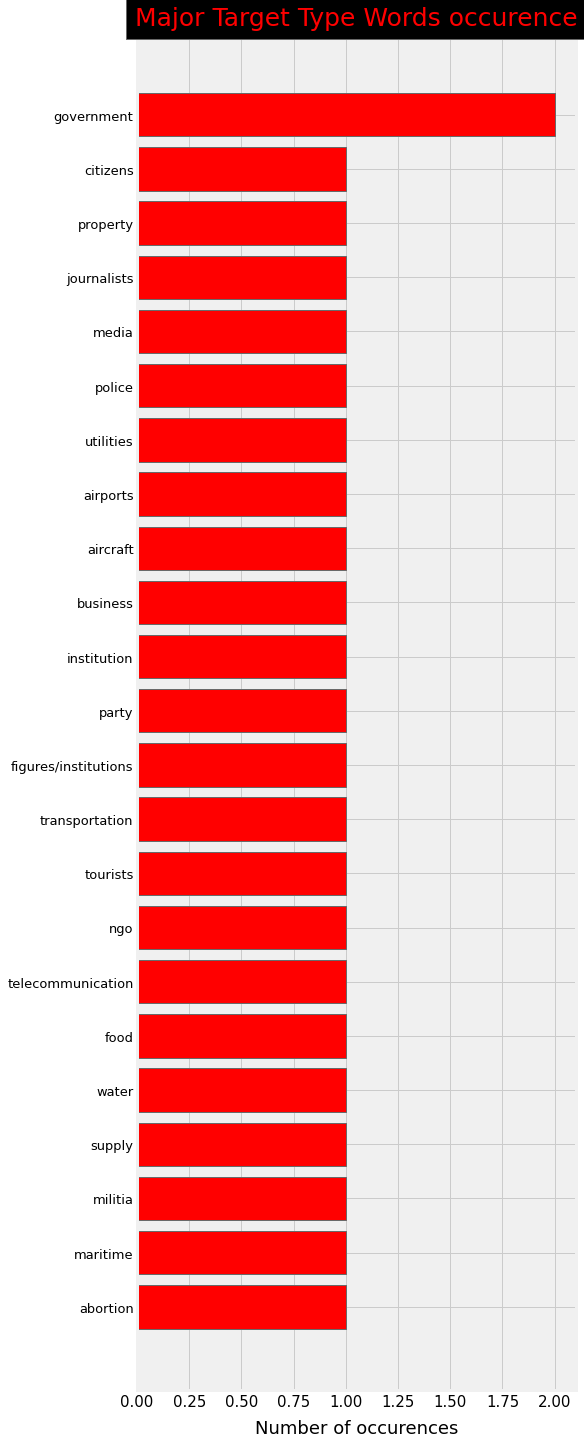

In [14]:
# Display the word occurances in major target type featureset.

target_type_list2 = sorted(target_type_list, key = lambda x:x[1], reverse = True)
plt.rc('font', weight='normal')
fig, ax = plt.subplots(figsize=(7, 25))
y_axis = [i[1] for i in target_type_list2[:125]]
x_axis = [k for k,i in enumerate(target_type_list2[:125])]
x_label = [i[0] for i in target_type_list[:125]]
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 13)
plt.yticks(x_axis, x_label)
plt.xlabel("Number of occurences", fontsize = 18, labelpad = 10)
ax.barh(x_axis, y_axis, align = 'center', color = 'r')
ax = plt.gca()
ax.invert_yaxis()

plt.title("Major Target Type Words occurence",bbox={'facecolor':'k', 'pad':5}, color='r',fontsize = 25)
plt.show()

In [15]:
# extract the names (proper, common) appearing in the target subtype description description

is_noun = lambda pos: pos[:2] == 'NN'

def keywords_inventory(dataframe, column = 'targsubtype1_txt'):
    stemmer = nltk.stem.SnowballStemmer("english")
    keywords_roots  = dict()  # collect the words / root
    keywords_select = dict()  # association: root <-> keyword
    category_keys   = []
    count_keywords  = dict()
    icount = 0
    for s in dataframe[column]:
        if pd.isnull(s): continue
        lines = s.lower()
        tokenized = nltk.word_tokenize(lines)
        nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
        
        for t in nouns:
            t = t.lower() ; racine = stemmer.stem(t)
            if racine in keywords_roots:                
                keywords_roots[racine].add(t)
                count_keywords[racine] += 1                
            else:
                keywords_roots[racine] = {t}
                count_keywords[racine] = 1
    
    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:  
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    clef = k ; min_length = len(k)            
            category_keys.append(clef)
            keywords_select[s] = clef
        else:
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]
                   
    print("No. of keywords in variable '{}': {}".format(column,len(category_keys)))
    return category_keys, keywords_roots, keywords_select, count_keywords

In [16]:
df_target_type = pd.DataFrame(df1['targsubtype1_txt'].unique()).rename(columns = {0:'targsubtype1_txt'})
keywords, keywords_roots, keywords_select, count_keywords = keywords_inventory(df_target_type)

No. of keywords in variable 'targsubtype1_txt': 135


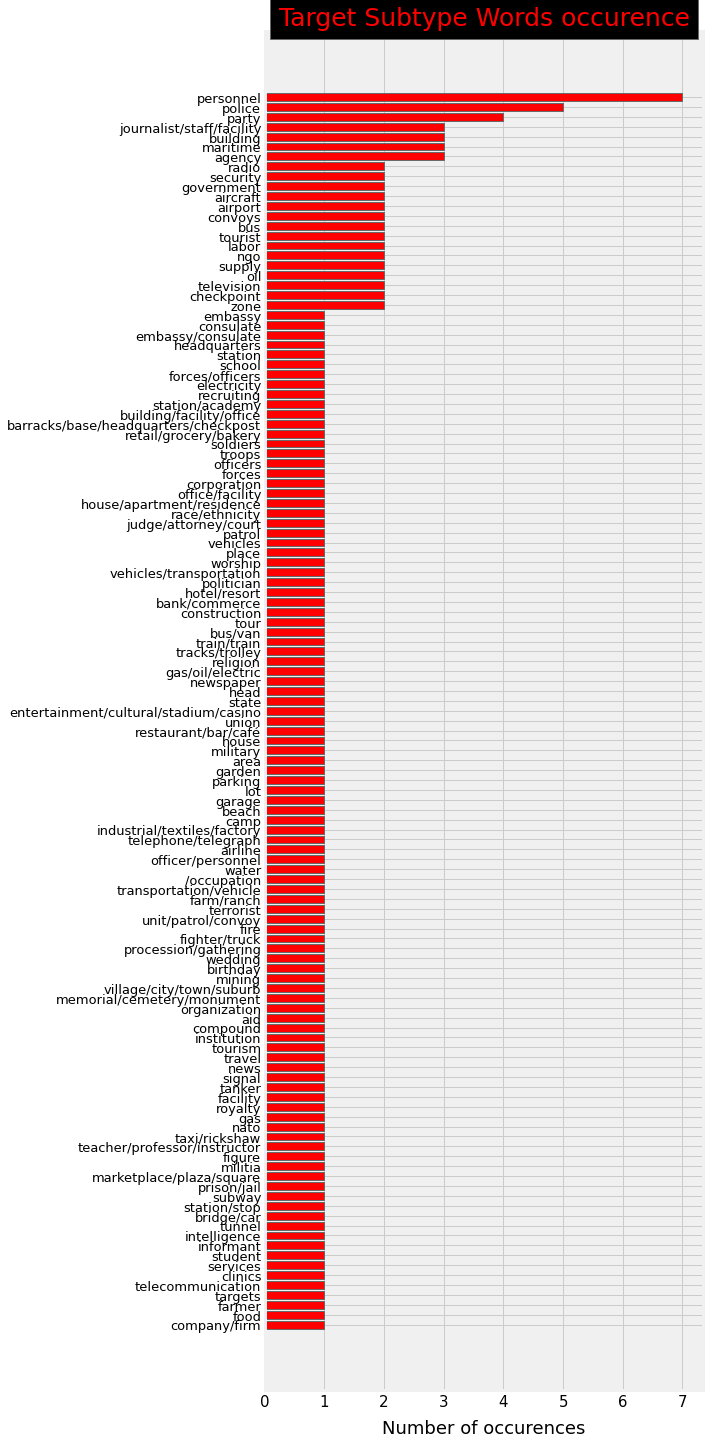

In [17]:
# Display the word occurances in major target subtype featureset
target_type_list = []
for k,v in count_keywords.items():
    target_type_list.append([keywords_select[k],v])
target_type_list.sort(key = lambda x:x[1], reverse = True)
target_type_list2 = sorted(target_type_list, key = lambda x:x[1], reverse = True)

plt.rc('font', weight='normal')
fig, ax = plt.subplots(figsize=(7, 25))
y_axis = [i[1] for i in target_type_list2[:125]]
x_axis = [k for k,i in enumerate(target_type_list2[:125])]
x_label = [i[0] for i in target_type_list[:125]]
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 13)
plt.yticks(x_axis, x_label)
plt.xlabel("Number of occurences", fontsize = 18, labelpad = 10)
ax.barh(x_axis, y_axis, align = 'center', color = 'r')
ax = plt.gca()
ax.invert_yaxis()

plt.title("Target Subtype Words occurence",bbox={'facecolor':'k', 'pad':5}, color='r',fontsize = 25)
plt.show()

No. of keywords in variable 'gname': 2866


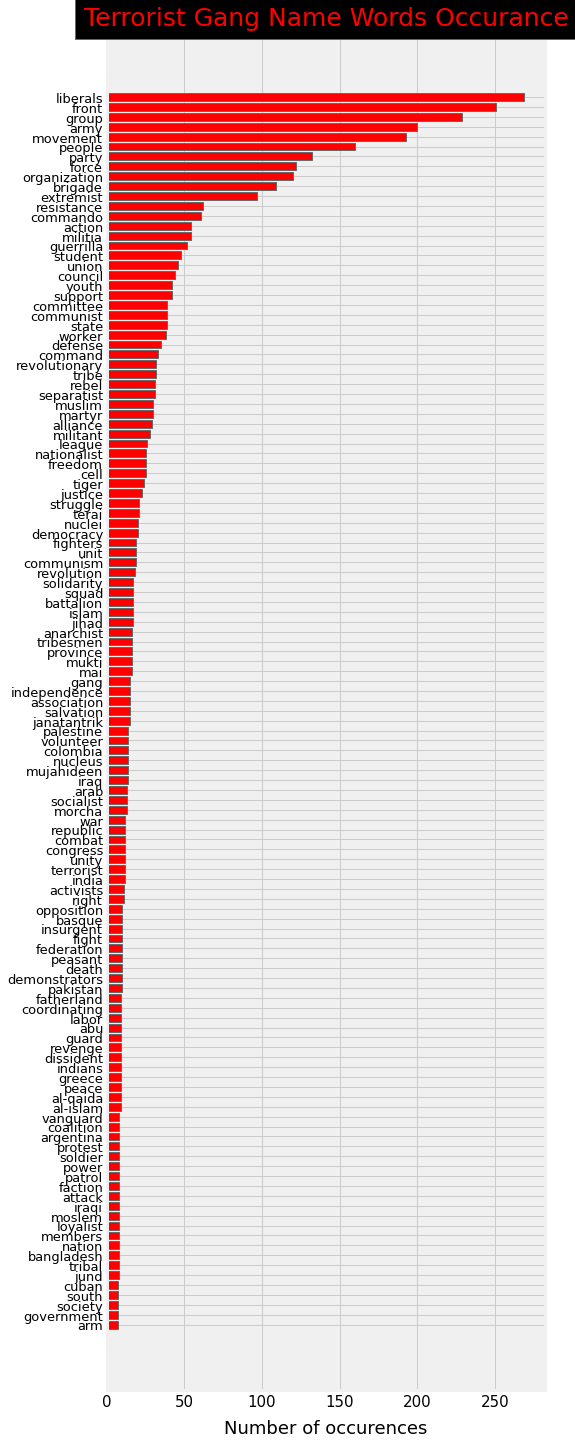

In [18]:
# extract the names (proper, common) appearing in the terrorist gang description

is_noun = lambda pos: pos[:2] == 'NN'

def keywords_inventory(dataframe, column = 'gname'):
    stemmer = nltk.stem.SnowballStemmer("english")
    keywords_roots  = dict()  # collect the words / root
    keywords_select = dict()  # association: root <-> keyword
    category_keys   = []
    count_keywords  = dict()
    icount = 0
    for s in dataframe[column]:
        if pd.isnull(s): continue
        lines = s.lower()
        tokenized = nltk.word_tokenize(lines)
        nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
        
        for t in nouns:
            t = t.lower() ; racine = stemmer.stem(t)
            if racine in keywords_roots:                
                keywords_roots[racine].add(t)
                count_keywords[racine] += 1                
            else:
                keywords_roots[racine] = {t}
                count_keywords[racine] = 1
    
    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:  
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    clef = k ; min_length = len(k)            
            category_keys.append(clef)
            keywords_select[s] = clef
        else:
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]
                   
    print("No. of keywords in variable '{}': {}".format(column,len(category_keys)))
    return category_keys, keywords_roots, keywords_select, count_keywords
df_target_type = pd.DataFrame(df1['gname'].unique()).rename(columns = {0:'gname'})
keywords, keywords_roots, keywords_select, count_keywords = keywords_inventory(df_target_type)

# Display the word occurances in major target type featureset
target_type_list = []
for k,v in count_keywords.items():
    target_type_list.append([keywords_select[k],v])
target_type_list.sort(key = lambda x:x[1], reverse = True)
target_type_list2 = sorted(target_type_list, key = lambda x:x[1], reverse = True)

plt.rc('font', weight='normal')
fig, ax = plt.subplots(figsize=(7, 25))
y_axis = [i[1] for i in target_type_list2[:125]]
x_axis = [k for k,i in enumerate(target_type_list2[:125])]
x_label = [i[0] for i in target_type_list[:125]]
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 13)
plt.yticks(x_axis, x_label)
plt.xlabel("Number of occurences", fontsize = 18, labelpad = 10)
ax.barh(x_axis, y_axis, align = 'center', color = 'r')
ax = plt.gca()
ax.invert_yaxis()

plt.title("Terrorist Gang Name Words Occurance",bbox={'facecolor':'k', 'pad':5}, color='r',fontsize = 25)
plt.show()

In [19]:
column_names = df1.columns.values.tolist()
print(column_names)
print(len(column_names))

['imonth', 'iday', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'target1', 'gname', 'weaptype1', 'weapsubtype1', 'nkill']
24


In [20]:
column_names41 = df41.columns.values.tolist()

# Label encoding the attributes with data containing string value

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in column_names:
    check = (type(i[1]) == str)
    if check == True:
        label = le.fit_transform(df1[i])
        df1.drop(i, axis=1, inplace=True)
        df1[i] = label

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in column_names41:
    check = (type(i[1]) == str)
    if check == True:
        label = le.fit_transform(df41[i])
        df41.drop(i, axis=1, inplace=True)
        df41[i] = label

In [23]:
# Dataframe with 16 attributes is created here.

matrix = df1[column_names].to_numpy()
df2 = df1.copy()

In [24]:
df2 = pd.DataFrame(data = df1)
display(df1)
df2 = df2.loc[:,['imonth', 'iday', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'target1', 'weaptype1', 'weapsubtype1', 'nkill','gname']]
df1 = df2.copy()  

,imonth,iday,country,country_txt,region,region_txt,provstate,city,latitude,longitude,...,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,target1,gname,weaptype1,weapsubtype1,nkill
0,7,2,46,47,1,1,2855,29806,19583,5578,...,1,13,13,66,59,40137,1907,11,30,1
1,0,0,111,116,0,6,782,22166,20138,471,...,6,6,5,43,15,48243,13,11,30,0
2,1,0,132,140,4,9,2497,34517,17959,43938,...,1,9,7,52,87,27324,3408,11,30,1
3,1,0,65,68,7,11,184,2513,42689,13789,...,2,6,5,44,19,75371,3408,4,15,205
4,1,0,86,90,3,3,808,11264,32934,47772,...,3,6,5,44,19,75350,3408,6,30,205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,12,31,148,159,10,10,1601,6849,4298,24729,...,0,3,9,35,47,17472,177,3,4,1
181687,12,31,160,175,9,5,1371,14575,38657,18356,...,2,3,9,26,46,34191,2138,4,10,2
181688,12,31,132,140,4,9,1479,18159,8621,46094,...,3,13,13,74,32,35372,601,6,17,0
181689,12,31,77,80,5,8,1510,14206,22835,41471,...,2,1,6,20,27,49588,3408,4,6,0


In [25]:
print(column_names41)

['eventid', 'iyear', 'imonth', 'iday', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'vicinity', 'location', 'summary', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'target1', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'gname', 'weaptype1', 'weapsubtype1', 'nkill', 'property', 'propextent', 'propextent_txt', 'ransom', 'ransomamt']


In [26]:
df41 = df41.loc[:,['eventid', 'iyear', 'imonth', 'iday', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'vicinity', 'location', 'summary', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'target1', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt','weaptype1', 'weapsubtype1', 'nkill', 'property', 'propextent', 'propextent_txt', 'ransom', 'ransomamt', 'gname']]
 

In [27]:
df2.head()

,imonth,iday,country,country_txt,region,region_txt,provstate,city,latitude,longitude,...,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,target1,weaptype1,weapsubtype1,nkill,gname
0,7,2,46,47,1,1,2855,29806,19583,5578,...,1,13,13,66,59,40137,11,30,1,1907
1,0,0,111,116,0,6,782,22166,20138,471,...,6,6,5,43,15,48243,11,30,0,13
2,1,0,132,140,4,9,2497,34517,17959,43938,...,1,9,7,52,87,27324,11,30,1,3408
3,1,0,65,68,7,11,184,2513,42689,13789,...,2,6,5,44,19,75371,4,15,205,3408
4,1,0,86,90,3,3,808,11264,32934,47772,...,3,6,5,44,19,75350,6,30,205,3408


In [28]:
df2.drop(['country_txt', 'region_txt', 'multiple', 'success', 'suicide',  'attacktype1_txt',  'targtype1_txt',  'targsubtype1_txt'], axis = 1, inplace = True)
df2.head()

,imonth,iday,country,region,provstate,city,latitude,longitude,attacktype1,targtype1,targsubtype1,target1,weaptype1,weapsubtype1,nkill,gname
0,7,2,46,1,2855,29806,19583,5578,0,13,66,40137,11,30,1,1907
1,0,0,111,0,782,22166,20138,471,5,6,43,48243,11,30,0,13
2,1,0,132,4,2497,34517,17959,43938,0,9,52,27324,11,30,1,3408
3,1,0,65,7,184,2513,42689,13789,2,6,44,75371,4,15,205,3408
4,1,0,86,3,808,11264,32934,47772,6,6,44,75350,6,30,205,3408


In [29]:
df41.head()

,eventid,iyear,imonth,iday,country,country_txt,region,region_txt,provstate,city,...,targsubtype2_txt,weaptype1,weapsubtype1,nkill,property,propextent,propextent_txt,ransom,ransomamt,gname
0,0,0,7,2,46,47,1,1,2855,29806,...,107,11,30,1,1,4,4,1,429,1907
1,1,0,0,0,111,116,0,6,782,22166,...,107,11,30,0,1,4,4,2,324,13
2,2,0,1,0,132,140,4,9,2497,34517,...,107,11,30,1,1,4,4,1,429,3408
3,3,0,1,0,65,68,7,11,184,2513,...,107,4,15,205,2,4,4,1,429,3408
4,4,0,1,0,86,90,3,3,808,11264,...,107,6,30,205,2,4,4,1,429,3408


In [30]:
df1.head()

,imonth,iday,country,country_txt,region,region_txt,provstate,city,latitude,longitude,...,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,target1,weaptype1,weapsubtype1,nkill,gname
0,7,2,46,47,1,1,2855,29806,19583,5578,...,1,13,13,66,59,40137,11,30,1,1907
1,0,0,111,116,0,6,782,22166,20138,471,...,6,6,5,43,15,48243,11,30,0,13
2,1,0,132,140,4,9,2497,34517,17959,43938,...,1,9,7,52,87,27324,11,30,1,3408
3,1,0,65,68,7,11,184,2513,42689,13789,...,2,6,5,44,19,75371,4,15,205,3408
4,1,0,86,90,3,3,808,11264,32934,47772,...,3,6,5,44,19,75350,6,30,205,3408


In [31]:
df2.head()

,imonth,iday,country,region,provstate,city,latitude,longitude,attacktype1,targtype1,targsubtype1,target1,weaptype1,weapsubtype1,nkill,gname
0,7,2,46,1,2855,29806,19583,5578,0,13,66,40137,11,30,1,1907
1,0,0,111,0,782,22166,20138,471,5,6,43,48243,11,30,0,13
2,1,0,132,4,2497,34517,17959,43938,0,9,52,27324,11,30,1,3408
3,1,0,65,7,184,2513,42689,13789,2,6,44,75371,4,15,205,3408
4,1,0,86,3,808,11264,32934,47772,6,6,44,75350,6,30,205,3408


In [32]:
column_names = df2.columns.values.tolist()
print(column_names)
print(len(column_names))

['imonth', 'iday', 'country', 'region', 'provstate', 'city', 'latitude', 'longitude', 'attacktype1', 'targtype1', 'targsubtype1', 'target1', 'weaptype1', 'weapsubtype1', 'nkill', 'gname']
16


# Baseline(Scikit-Learn) model training and testing on all three datasets

In [40]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df41[['eventid', 'iyear', 'imonth', 'iday', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'vicinity', 'location', 'summary', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'target1', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt','weaptype1', 'weapsubtype1', 'nkill', 'property', 'propextent', 'propextent_txt', 'ransom', 'ransomamt']], df41['gname'], test_size=0.2)

GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_pred = GNB.predict(X_test)
acc_df41 = accuracy_score(y_test, y_pred)
df41.to_csv(r'C:\Users\sourav\Desktop\Data Mining Project\Final File\preprocessed_GTfile_41.csv', header=False, index=False)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df1[['imonth', 'iday', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'target1', 'weaptype1', 'weapsubtype1', 'nkill']], df1['gname'], test_size=0.2)
GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_pred = GNB.predict(X_test)
acc_df1 = accuracy_score(y_test, y_pred)
df1.to_csv(r'C:\Users\sourav\Desktop\Data Mining Project\Final File\preprocessed_GTfile_24.csv', header=False, index=False)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df2[['imonth', 'iday', 'country', 'region', 'provstate', 'city', 'latitude', 'longitude', 'attacktype1', 'targtype1', 'targsubtype1', 'target1', 'weaptype1', 'weapsubtype1', 'nkill']], df2['gname'], test_size=0.2)
GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_pred = GNB.predict(X_test)
acc_df2 = accuracy_score(y_test, y_pred)
df2.to_csv(r'C:\Users\sourav\Desktop\Data Mining Project\Final File\preprocessed_GTfile_16.csv', header=False, index=False)

# Self-implemented model training and testing on all three datasets

In [43]:
"""Self implemented Gaussian Naive Bayes Classifier"""


import math
import random
import csv
global varience

# Calculating Mean
def mean(num):
    return sum(num) / float(len(num))
 
# Calculating Standard Deviation
def standard_deviation(num):
    global varience
    varience = 0
    avg = mean(num)
    try:
       variance = sum([pow(x - avg, 2) for x in num]) / float(len(num) - 1)
    except ZeroDivisionError:
       varience = sum([pow(x - avg, 2) for x in num]) / 1.0
    return math.sqrt(varience)
 
 
# Categorical data to numberic data
def encoding(data):
    classes = []
    for i in range(len(data)):
        if data[i][-1] not in classes:
            classes.append(data[i][-1])
    for i in range(len(classes)):
        for j in range(len(data)):
            if data[j][-1] == classes[i]:
                data[j][-1] = i
    return data           
             
 
# Splitting the data
def splitting(data, ratio):
    train_num = int(len(data) * ratio)
    train = []
    test = list(data)
    while len(train) < train_num:
        index = random.randrange(len(test))
        # from testing set pop data rows and put it in training set
        train.append(test.pop(index))
    return train, test
 
 
# Group the data rows under each class 
def grouping(data):
      dict = {}
      for i in range(len(data)):
          if (data[i][-1] not in dict):
              dict[data[i][-1]] = []
          dict[data[i][-1]].append(data[i])
      return dict
 
 

 
def mean_standardDeviation(data):
    info = [(mean(attribute), standard_deviation(attribute)) for attribute in zip(*data)]
    del info[-1]
    return info
 
# finding mean and standard deviation for each class
def class_mean_standardDeviation(data):
    info = {}
    dict = grouping(data)
    for classValue, instances in dict.items():
        info[classValue] = mean_standardDeviation(instances)
    return info
 
 
# Calculating gaussian probability density function
def gaussian_probability(x, mean, standard_deviation):
    try:
        expo = math.exp(-(math.pow(x - mean, 2) / (2 * math.pow(standard_deviation, 2))))
        return (1 / (math.sqrt(2 * math.pi) * standard_deviation)) * expo
 
    except ZeroDivisionError:
        expo = math.exp(0)
        return 0
 
 
# Calculating class probabilities
def class_probabilities(info, test):
    probabilities = {}
    for classValue, classSummaries in info.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, std_dev = classSummaries[i]
            x = test[i]
            probabilities[classValue] *= gaussian_probability(x, mean, std_dev)
    return probabilities
 
 

def predict(info, test):
    probabilities = class_probabilities(info, test)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel
 
 
# predictions 
def value_predictions(info, test):
    predictions = []
    for i in range(len(test)):
        result = predict(info, test[i])
        predictions.append(result)
    return predictions
 
# Accuracy 
def accuracy(test, predictions):
    correct = 0
    for i in range(len(test)):
        if test[i][-1] == predictions[i]:
            correct += 1
    return (correct / float(len(test))) * 100.0

#---------------------------------------------------------------------------------------------------------------------------------------------------
# Training and Testing for dataset with 40 input attributes
 
# Loading the dataset
filename = r'preprocessed_GTfile_41.csv'
data_set = csv.reader(open(filename, "rt"))
data_set = list(data_set)
data_set = encoding(data_set)
for i in range(len(data_set)):
    data_set[i] = [float(x) for x in data_set[i]]
 
# 80% is training and 20% is for testing
train_ratio = 0.8
train_data, test_data = splitting(data_set, train_ratio)
 
# Fitting the model
fit = class_mean_standardDeviation(train_data)
 
# Model Testing
predictions = value_predictions(fit, test_data)
accuracy_df41 = accuracy(test_data, predictions)
print("Accuracy is: ", accuracy_df41)

#----------------------------------------------------------------------------------------------------------------------------------------------------
# Training and Testing for dataset with 23 input attributes
 
# Loading the dataset
filename = r'preprocessed_GTfile_24.csv'
data_set = csv.reader(open(filename, "rt"))
data_set = list(data_set)
data_set = encoding(data_set)
for i in range(len(data_set)):
    data_set[i] = [float(x) for x in data_set[i]]

train_ratio = 0.8
train_data, test_data = splitting(data_set, train_ratio)
 
# Fitting the model
fit = class_mean_standardDeviation(train_data)
 
# Model testing
predictions = value_predictions(fit, test_data)
accuracy_df1 = accuracy(test_data, predictions)
print("Accuracy is: ", accuracy_df1)

#-----------------------------------------------------------------------------------------------------------------------------------------------------
# Training and Testing for dataset with 15 input attributes
 
# Loading the dataset
filename = r'preprocessed_GTfile_16.csv'
data_set = csv.reader(open(filename, "rt"))
data_set = list(data_set)
data_set = encoding(data_set)
for i in range(len(data_set)):
    data_set[i] = [float(x) for x in data_set[i]]

train_ratio = 0.8
train_data, test_data = splitting(data_set, train_ratio)
 
# Fitting the model
fit = class_mean_standardDeviation(train_data)
 
# Model testing
predictions = value_predictions(fit, test_data)
accuracy_df2 = accuracy(test_data, predictions)
print("Accuracy is: ", accuracy_df2)

Accuracy is:  28.15
Accuracy is:  1.25
Accuracy is:  28.4


# Accuracy scores

In [44]:
acc_df41 = (acc_df41)*100
acc_df1 = (acc_df1)*100
acc_df2 = (acc_df2)*100

print("Accuracy of all three datasets are: \n")
print("Scikit-Learn based model accuracy: \n")
print("Accuracy of dataset with 41 attributes is: ", acc_df41)
print("Accuracy of dataset with 24 attributes is: ", acc_df1)
print("Accuracy of dataset with 16 attributes is: ", acc_df2, "\n")
print("Self implemented Gaussian Naive Bayes model accuracy: \n")
print("Accuracy of dataset with 41 attributes is: ", accuracy_df41)
print("Accuracy of dataset with 24 attributes is: ", accuracy_df1)
print("Accuracy of dataset with 16 attributes is: ", accuracy_df2)


Accuracy of all three datasets are: 

Scikit-Learn based model accuracy: 

Accuracy of dataset with 41 attributes is:  17.65
Accuracy of dataset with 24 attributes is:  16.05
Accuracy of dataset with 16 attributes is:  17.599999999999998 

Self implemented Gaussian Naive Bayes model accuracy: 

Accuracy of dataset with 41 attributes is:  28.15
Accuracy of dataset with 24 attributes is:  1.25
Accuracy of dataset with 16 attributes is:  28.4


# Visualization of the performance of both models

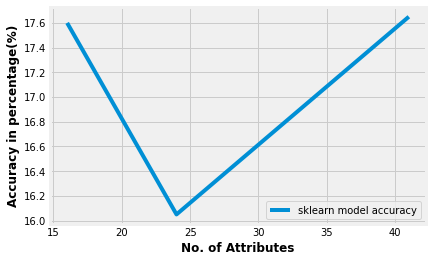

In [45]:
x = [41, 24, 16]
y1 = [acc_df41, acc_df1, acc_df2]
y2 = [accuracy_df41, accuracy_df1, accuracy_df2]
# plot lines
plt.plot(x, y1, label = "sklearn model accuracy")
plt.xlabel('No. of Attributes', fontweight ='bold', fontsize = 12)
plt.ylabel('Accuracy in percentage(%)', fontweight ='bold', fontsize = 12)
plt.legend()
plt.show()

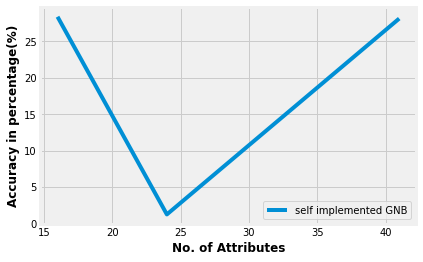

In [46]:
plt.plot(x, y2, label = "self implemented GNB")
plt.xlabel('No. of Attributes', fontweight ='bold', fontsize = 12)
plt.ylabel('Accuracy in percentage(%)', fontweight ='bold', fontsize = 12)
plt.legend()
plt.show()

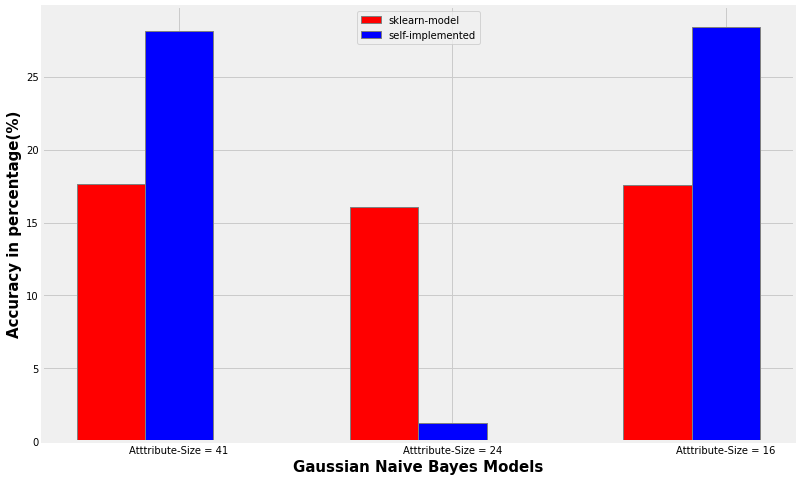

In [47]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

y1 = [acc_df41, acc_df1, acc_df2]
y2 = [accuracy_df41, accuracy_df1, accuracy_df2]
br1 = np.arange(len(y1))
br2 = [x + barWidth for x in br1]

plt.bar(br1, y1, color ='r', width = barWidth,
        edgecolor ='grey', label ='sklearn-model')
plt.bar(br2, y2, color ='b', width = barWidth,
        edgecolor ='grey', label ='self-implemented')

plt.xlabel('Gaussian Naive Bayes Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy in percentage(%)', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(y1))],
        ['Atttribute-Size = 41', 'Atttribute-Size = 24', 'Atttribute-Size = 16'])
 
plt.legend()
plt.show()


# F-1 Score Calculation on dataset with 16 Attribute Set

In [62]:
# Sklearn Model F1-score
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred, average='weighted'))


0.17294723363845857


In [63]:
# Self-implemented f1-score
a = []
a = [test_data[i][-1] for i in range(len(test_data))]    
print(f1_score(a, predictions, average='weighted'))

0.12563239875389406
